In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
testpath = "/content/drive/My Drive/data/test_houseprices.csv"
trainpath = "/content/drive/My Drive/data/train_houseprices.csv"
dfTrain = pd.read_csv(trainpath)
dfTest=pd.read_csv(testpath)
print (dfTrain.shape)
print(dfTest.shape)

(1460, 81)
(1459, 80)


In [ ]:
dfTrain.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dfTest.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
percent_missing = dfTrain.isnull().sum() * 100 / len(dfTrain)
missing_value_df = pd.DataFrame({'column_name': dfTrain.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.loc[missing_value_df['percent_missing'] > 0]

,column_name,percent_missing
Electrical,Electrical,0.068493
MasVnrType,MasVnrType,0.547945
MasVnrArea,MasVnrArea,0.547945
BsmtQual,BsmtQual,2.534247
BsmtCond,BsmtCond,2.534247
BsmtFinType1,BsmtFinType1,2.534247
BsmtFinType2,BsmtFinType2,2.602740
BsmtExposure,BsmtExposure,2.602740
GarageQual,GarageQual,5.547945
GarageFinish,GarageFinish,5.547945


In [ ]:
#Dropping all the columns having greater than 50% values missing
dfTrain=dfTrain.drop(["Fence","Alley","MiscFeature","PoolQC"],axis=1)
dfTest=dfTest.drop(["Fence","Alley","MiscFeature","PoolQC"],axis=1)

In [ ]:
def TreatNullValuesInData(df):
  for column in df:
    colType=df[column].dtype
    if colType=='object':
      df[column]=df[column].str.upper()
      df[column].fillna('NONE',inplace=True)
    else:
      df[column].fillna(0,inplace=True)

  

In [ ]:
TreatNullValuesInData(dfTrain)
TreatNullValuesInData(dfTest)
print(dfTrain.shape)
print(dfTest.shape)

(1460, 77)
(1459, 76)


In [ ]:
def LabelEncoding(df):
  for column in df:
    colType=df[column].dtype
    if colType=='object':
      labelColumn=df[column].astype('category').cat.categories.tolist()
      Encode_labelColumn={column: {k: v for k,v in zip(labelColumn,list(range(1,len(labelColumn)+1)))}}
      df.replace(Encode_labelColumn,inplace=True)



In [ ]:
LabelEncoding(dfTrain)
LabelEncoding(dfTest)
print (dfTrain.head(5))
print (dfTest.head(5))

   Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
0   1          60         4  ...         9              5     208500
1   2          20         4  ...         9              5     181500
2   3          60         4  ...         9              5     223500
3   4          70         4  ...         9              1     140000
4   5          60         4  ...         9              5     250000

[5 rows x 77 columns]
     Id  MSSubClass  MSZoning  ...  YrSold  SaleType  SaleCondition
0  1461          20         4  ...    2010        10              5
1  1462          20         5  ...    2010        10              5
2  1463          60         5  ...    2010        10              5
3  1464          60         5  ...    2010        10              5
4  1465         120         5  ...    2010        10              5

[5 rows x 76 columns]


In [ ]:
def showcorrelationheatmap(df):
  plt.figure(figsize=(12,10))
  cor=df.corr()
  sns.heatmap(cor,annot=True, cmap=plt.cm.Reds)
  plt.show()

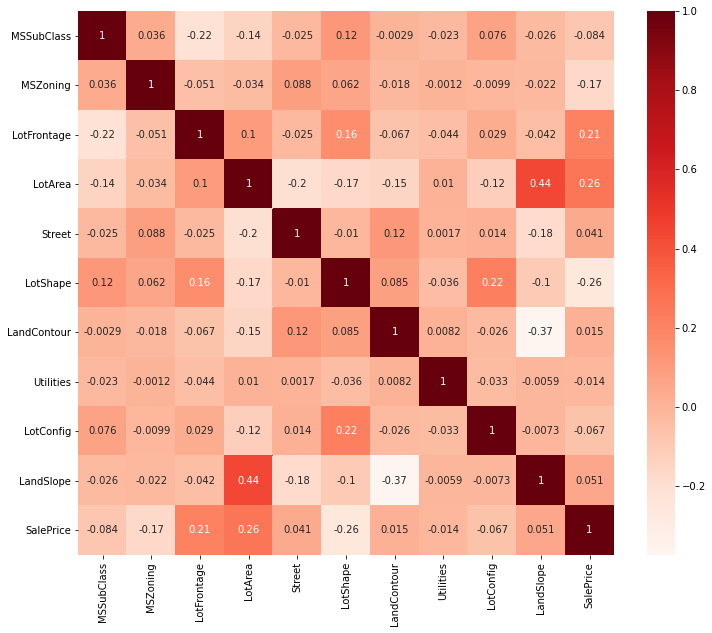

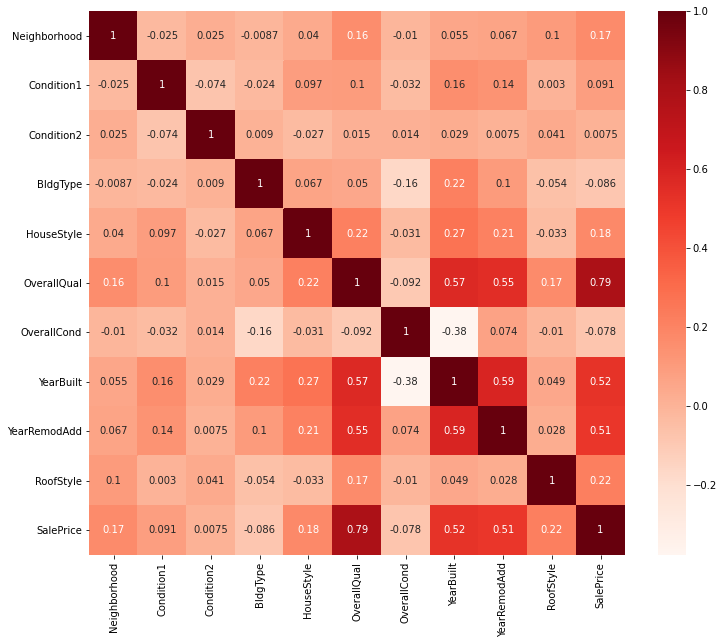

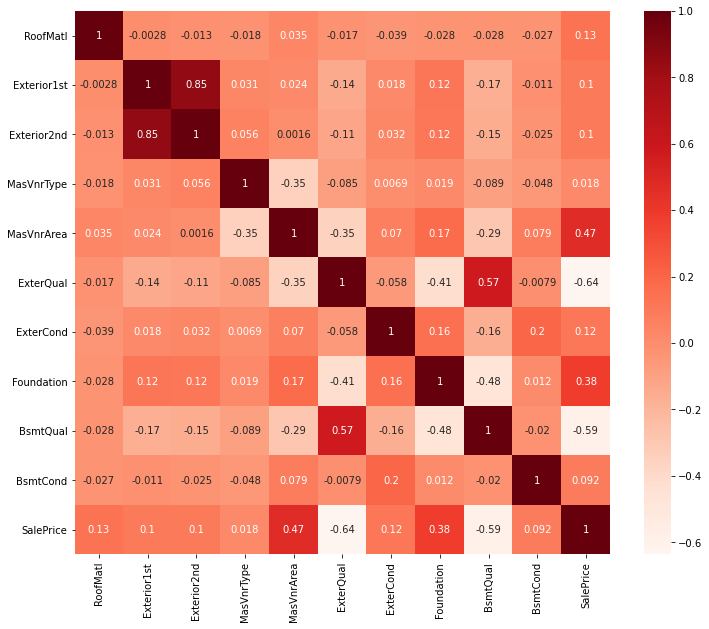

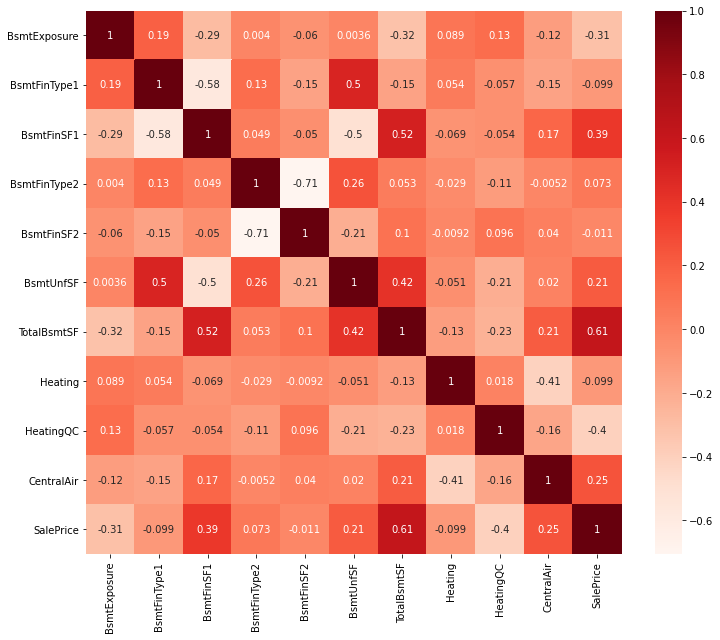

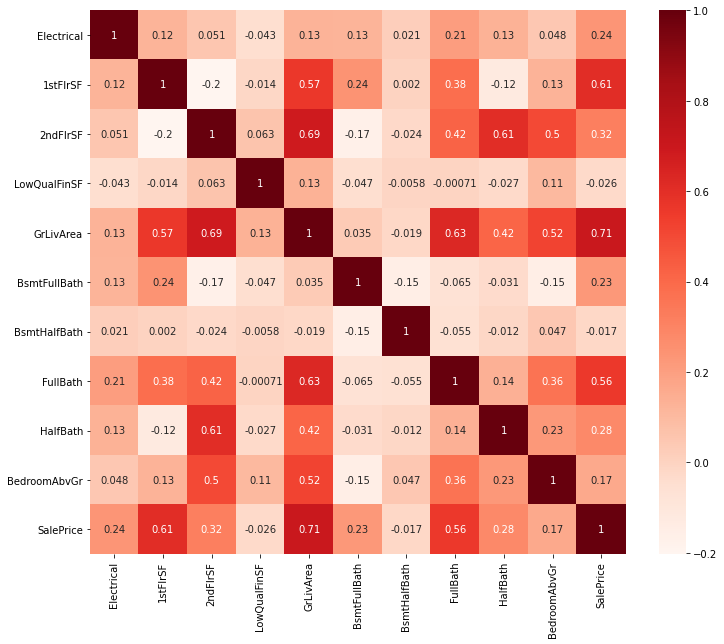

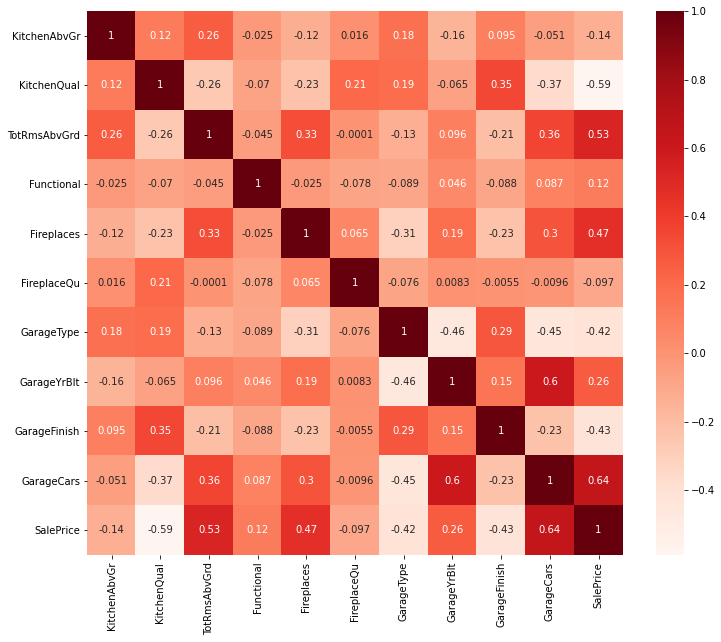

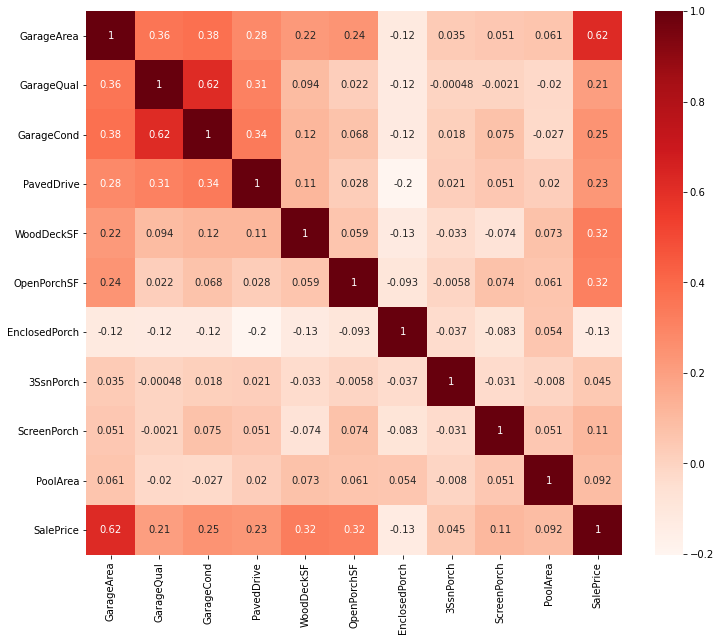

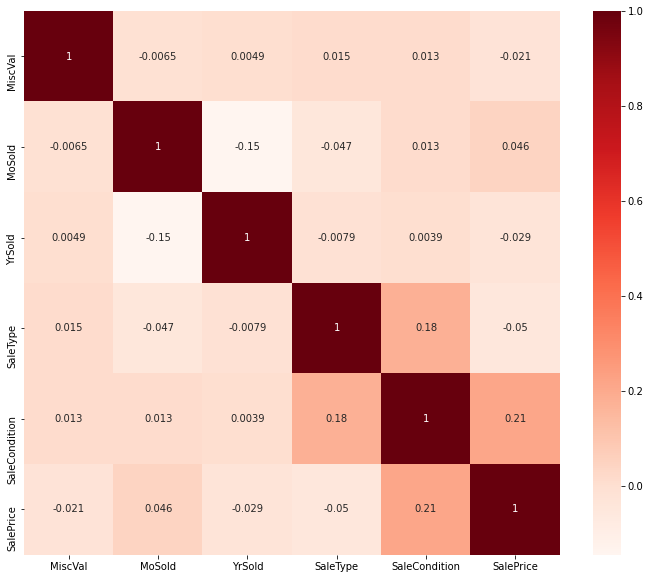

In [ ]:
selected_columns_1_10=dfTrain[["MSSubClass","MSZoning","LotFrontage","LotArea","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","SalePrice"]]
dfTrain_1_10=selected_columns_1_10.copy()
showcorrelationheatmap(dfTrain_1_10)

selected_columns_11_20=dfTrain[["Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt","YearRemodAdd","RoofStyle","SalePrice"]]
dfTrain_11_20=selected_columns_11_20.copy()
showcorrelationheatmap(dfTrain_11_20)

selected_columns_21_30=dfTrain[["RoofMatl",	"Exterior1st","Exterior2nd","MasVnrType","MasVnrArea","ExterQual","ExterCond","Foundation",	"BsmtQual",	"BsmtCond","SalePrice"]]
dfTrain_21_30=selected_columns_21_30.copy()
showcorrelationheatmap(dfTrain_21_30)

selected_columns_31_40=dfTrain[["BsmtExposure",	"BsmtFinType1",	"BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",	"Heating","HeatingQC","CentralAir","SalePrice"]]
dfTrain_31_40=selected_columns_31_40.copy()
showcorrelationheatmap(dfTrain_31_40)

selected_columns_41_50=dfTrain[["Electrical","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","SalePrice"]]
dfTrain_41_50=selected_columns_41_50.copy()
showcorrelationheatmap(dfTrain_41_50)

selected_columns_51_60=dfTrain[["KitchenAbvGr",	"KitchenQual","TotRmsAbvGrd","Functional","Fireplaces",	"FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageCars","SalePrice"]]
dfTrain_51_60=selected_columns_51_60.copy()
showcorrelationheatmap(dfTrain_51_60)

selected_columns_61_70=dfTrain[["GarageArea","GarageQual","GarageCond","PavedDrive","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","SalePrice"]]
dfTrain_61_70=selected_columns_61_70.copy()
showcorrelationheatmap(dfTrain_61_70)

selected_columns_71_77=dfTrain[["MiscVal","MoSold","YrSold","SaleType","SaleCondition","SalePrice"]]
dfTrain_71_77=selected_columns_71_77.copy()
showcorrelationheatmap(dfTrain_71_77)

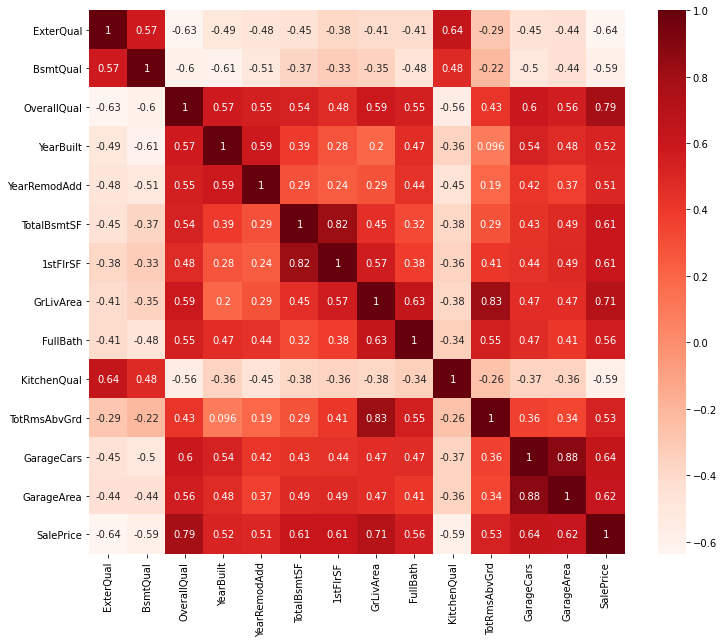

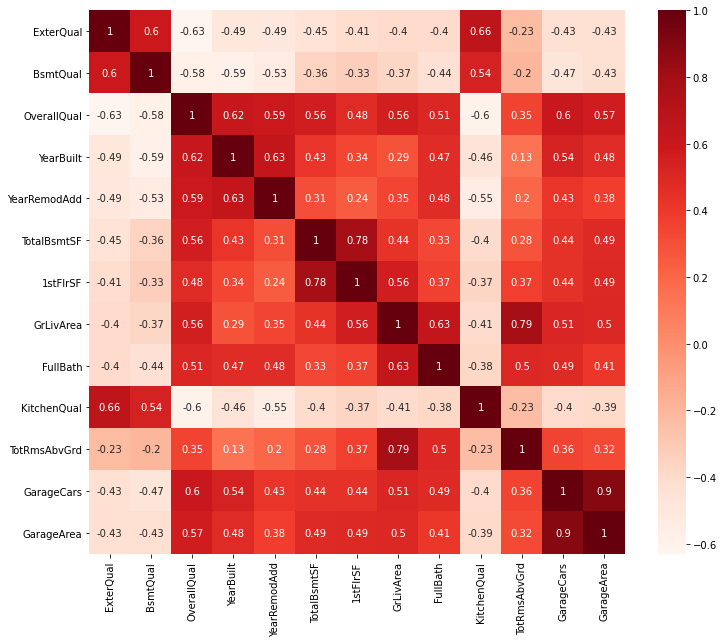

In [ ]:
#These columns have cor with SalePrice between -5 <Sale Price > +5
#ExterQual(-) BsmtQual (-) OverallQual yearBuilt YearRemodAdd TotalBsmtSF 1stFlrSF GrLivArea FullBath KitchenQual(-) TotRmsAbvGrd GarageCars GarageArea
CorrelatedTrainColumns=dfTrain[["ExterQual","BsmtQual","OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","KitchenQual","TotRmsAbvGrd","GarageCars","GarageArea","SalePrice"]]
CorrelatedTestColumns=dfTest[["ExterQual","BsmtQual","OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","KitchenQual","TotRmsAbvGrd","GarageCars","GarageArea"]]

dfTrainData=CorrelatedTrainColumns.copy()
showcorrelationheatmap(dfTrainData)

dfTestData=CorrelatedTestColumns.copy()
showcorrelationheatmap(dfTestData)



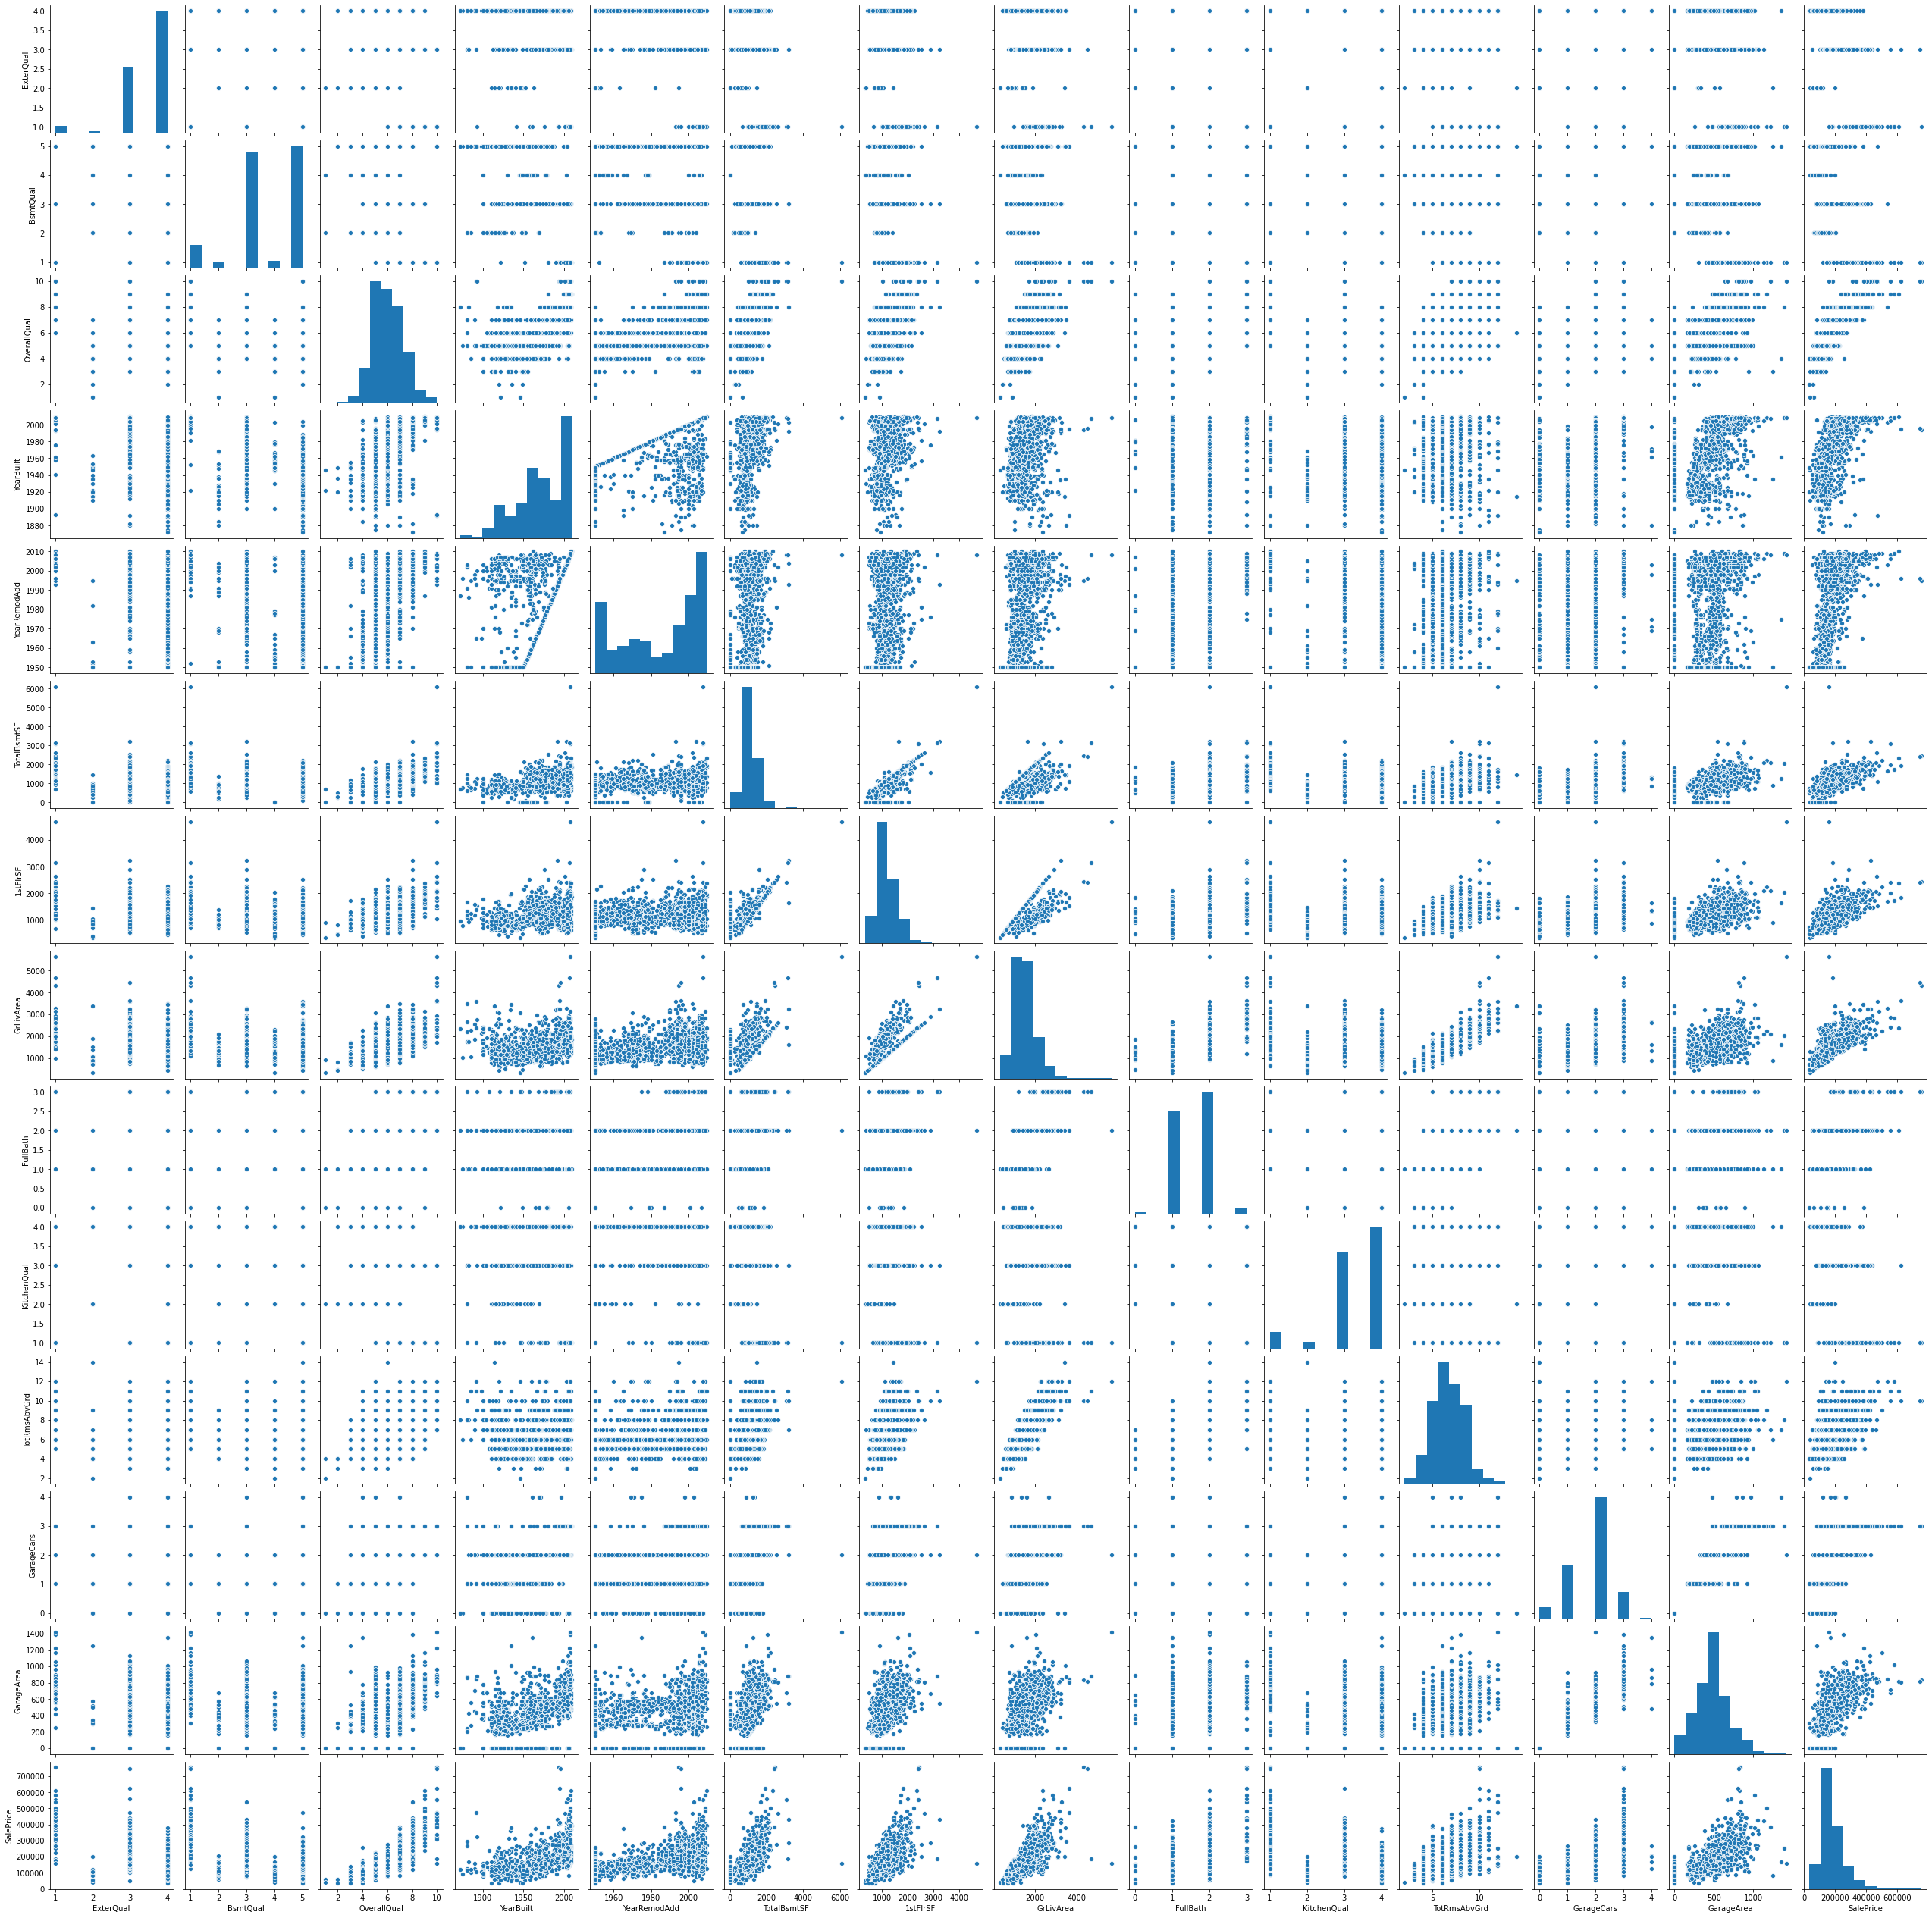

In [ ]:
sns.pairplot(dfTrainData)

In [ ]:
#Finding and Treating Outliers in TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea, SalePrice
dfTrainData.describe()

,ExterQual,BsmtQual,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.539726,3.724658,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,3.339726,6.517808,1.767123,472.980137,180921.195890
std,0.693995,1.278630,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,0.830161,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,1.000000,2.000000,0.000000,0.000000,34900.000000
25%,3.000000,3.000000,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,3.000000,5.000000,1.000000,334.500000,129975.000000
50%,4.000000,3.000000,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,4.000000,6.000000,2.000000,480.000000,163000.000000
75%,4.000000,5.000000,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,4.000000,7.000000,2.000000,576.000000,214000.000000
max,4.000000,5.000000,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,4.000000,14.000000,4.000000,1418.000000,755000.000000


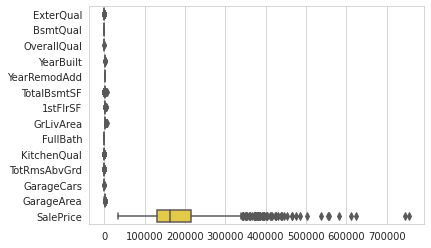

In [ ]:
#Finding Outliers ?
sns.set_style("whitegrid")
sns.boxplot(data=dfTrainData,orient="h",palette="Set2")

(1438, 14)


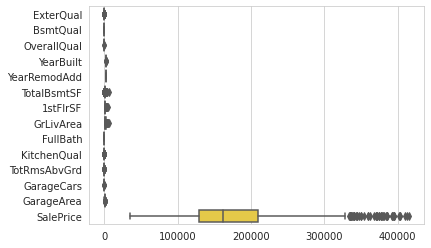

In [ ]:
#Let us remove outlier in Sale Price
dfTrainData=dfTrainData[np.abs(dfTrainData.SalePrice - dfTrainData.SalePrice.mean()) <= (3 * dfTrainData.SalePrice.std())]
print(dfTrainData.shape)
sns.boxplot(data=dfTrainData,orient="h",palette="Set2")


In [ ]:
#By Looking at the pair plot YearBuilt, YearremodAdd, TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea share some kind of linear relationship with Sale Price
X=dfTrainData[["YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","GarageArea"]].copy()
y=dfTrainData["SalePrice"].copy()

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model=LinearRegression()
model.fit(X_train,y_train)
print('Model Accuracy:' + str(model.score(X_test,y_test).round(2)))
#model.score()

Model Accuracy:0.76


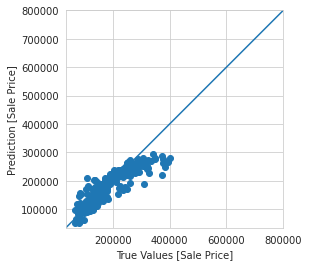

In [ ]:
y_pred=model.predict(X_test).flatten()
a=plt.axes(aspect='equal')
plt.scatter(y_test,y_pred)
plt.xlabel('True Values [Sale Price]')
plt.ylabel('Prediction [Sale Price]')
lims=[35000,800000]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims,lims)


In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted': y_pred})
df.head(30).round(0)

,Actual,Predicted
34,277500,226165.0
1078,155900,158323.0
1276,162000,156196.0
336,377426,263676.0
142,166000,153012.0
368,132000,128717.0
557,108000,117677.0
281,185000,203730.0
474,251000,221522.0
1145,149000,123042.0


In [ ]:
#Saving model
from sklearn.externals import joblib
joblib.dump(model,'HousePricingModel.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['HousePricingModel.pkl']

In [ ]:
#Loading Model to predict
housepricemodel=joblib.load('HousePricingModel.pkl')
housepricemodel.predict(X_test)

array([226164.54633298, 158323.48400508, 156195.7154951 , 263676.49362196,
       153011.97385461, 128716.81304885, 117677.36692451, 203730.28878322,
       221521.90900843, 123042.37967231, 158323.48400508, 204683.82596053,
       168940.00769777, 139457.30259138,  95066.36188475, 176800.45974016,
       210342.2640113 ,  98089.06892138, 139138.61490356, 253597.50976561,
       127016.6449355 , 237166.25032853, 281388.92853278, 158323.48400508,
       185257.49351882, 183641.65917261, 215943.37676292, 111633.31530732,
       158046.14599573, 269560.58753701, 161677.71446196, 196650.87754669,
       209479.45252798, 238531.70011407, 152354.59624914, 138309.66391094,
       224112.56361015, 172016.52694104, 125824.93327501, 137696.9864275 ,
       262506.28315395, 118053.51738339, 212928.94049627, 137396.93284106,
       205589.62880886,  98841.35043916, 222135.95284546, 240172.49297338,
       156571.91787802, 264875.38101905, 104844.89588758, 138116.65214399,
       153117.91823212, 1